# Justification

http://insideairbnb.com

Airbnb claims to be part of the "sharing economy" and disrupting the hotel industry. However, data shows that the majority of Airbnb listings in most cities are entire homes, many of which are rented all year round - disrupting housing and communities.

By analyzing publicly available information about a city's Airbnb's listings, we can see how Airbnb is being used to compete with the residential housing market.

We can ask fundamental questions about Airbnb in any neighbourhood, or across the city as a whole. Questions such as:

   - How many listings are in my neighbourhood and where are they?
   
   - How many houses and apartments are being rented out frequently to tourists and not to long-term residents?
   
   - How much are hosts making from renting to tourists (compare that to long-term rentals)?
   
   - Which hosts are running a business with multiple listings and where they?
   
   - Can we create a model that predicts prices?


## 1. Cleaning the Data

### 1.1 - The different types of prices were shown as strings. I converted them to floats. 

In [ ]:
df['price'].dtype

dtype('O')

In [ ]:
df.iloc[0]['price']

'$125.00'

In [ ]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price']

0         125.00
1         145.00
2         169.00
3          99.00
4         150.00
           ...  
304978     52.00
304979     16.00
304980     32.00
304981     40.00
304982     15.00
Name: price, Length: 304983, dtype: object

In [ ]:
df['price'] = df['price'].astype(float)
df['price'].dtype

dtype('float64')

In [ ]:
df['weekly_price'] = df['weekly_price'].str.replace('$', '')
df['weekly_price'] = df['weekly_price'].str.replace(',', '')
df['weekly_price']

0          750.00
1          980.00
2             NaN
3         1200.00
4         1200.00
           ...   
304978        NaN
304979        NaN
304980        NaN
304981        NaN
304982        NaN
Name: weekly_price, Length: 304983, dtype: object

In [ ]:
df['weekly_price'] = df['weekly_price'].astype(float)
df['weekly_price'].dtype

dtype('float64')

In [ ]:
df['monthly_price'] = df['monthly_price'].str.replace('$', '')
df['monthly_price'] = df['monthly_price'].str.replace(',', '')
df['monthly_price']

0         2250.00
1         3000.00
2             NaN
3         2900.00
4         3000.00
           ...   
304978        NaN
304979        NaN
304980        NaN
304981        NaN
304982        NaN
Name: monthly_price, Length: 304983, dtype: object

In [ ]:
df['monthly_price'] = df['monthly_price'].astype(float)
df['monthly_price'].dtype

dtype('float64')

In [ ]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].astype(float)
df['host_response_rate'].dtype

dtype('float64')

In [ ]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)
df['host_acceptance_rate'].dtype

dtype('float64')

In [ ]:
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '')
df['cleaning_fee'] = df['cleaning_fee'].astype(float)
df['cleaning_fee'].dtype

dtype('float64')

In [ ]:
df['extra_people'] = df['extra_people'].str.replace('$', '')
df['extra_people'] = df['extra_people'].str.replace(',', '')
df['extra_people'] = df['extra_people'].astype(float)
df['extra_people'].dtype

dtype('float64')

In [ ]:
df['security_deposit'] = df['security_deposit'].str.replace('$', '')
df['security_deposit'] = df['security_deposit'].str.replace(',', '')
df['security_deposit'] = df['security_deposit'].astype(float)
df['security_deposit'].dtype

dtype('float64')

In [ ]:
df.dtypes.value_counts()

object     57
float64    31
int64      20
dtype: int64

### 1.2 - Check and deal with NAs. I also dropped some columns that either had too many NAs or did not provide useful information  

In [ ]:
df.select_dtypes(include=['int', 'float']).isna().sum()

accommodates                                         0
availability_30                                      0
availability_365                                     0
availability_60                                      0
availability_90                                      0
bathrooms                                        20953
bedrooms                                          1081
beds                                              3041
calculated_host_listings_count                       0
calculated_host_listings_count_entire_homes          0
calculated_host_listings_count_private_rooms         0
calculated_host_listings_count_shared_rooms          0
cleaning_fee                                     80438
extra_people                                     20703
guests_included                                  20703
host_acceptance_rate                             68875
host_id                                              0
host_listings_count                                 58
host_respo

In [ ]:
df.drop(['xl_picture_url', 'thumbnail_url','square_feet','number_of_reviews_l30d','scrape_id','medium_url'], axis=1, inplace=True)

In [ ]:
df.select_dtypes(include=['int', 'float']).isna().sum()/len(df)*100

accommodates                                     0.000000
availability_30                                  0.000000
availability_365                                 0.000000
availability_60                                  0.000000
availability_90                                  0.000000
bathrooms                                        6.870219
bedrooms                                         0.354446
beds                                             0.997105
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
cleaning_fee                                    26.374585
extra_people                                     6.788247
guests_included                                  6.788247
host_acceptance_rate                            22.583226
host_id                                          0.000000
host_listings_

Since different cities have different characteristics, to fill some NA values I calculated the mean and the median, depending on the column, of each city. Most of the reviews I'll drop, leaving only the final rating. 

In [ ]:
df.select_dtypes(include =['int','float']).describe()

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cleaning_fee,extra_people,guests_included,host_acceptance_rate,host_id,host_listings_count,host_response_rate,host_total_listings_count,id,latitude,longitude,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,monthly_price,number_of_reviews,number_of_reviews_ltm,price,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,weekly_price
count,304983.000000,304983.000000,304983.000000,304983.000000,304983.000000,284030.000000,303902.000000,301942.000000,304983.000000,304983.000000,304983.000000,304983.000000,224545.000000,284280.000000,284280.000000,236108.000000,3.049830e+05,304925.000000,207394.000000,304925.000000,3.049830e+05,304983.000000,304983.000000,3.049830e+05,304983.000000,3.049830e+05,3.049830e+05,3.049830e+05,304983.000000,304983.000000,304983.000000,18905.000000,304983.000000,304983.000000,304983.000000,230636.000000,230529.000000,230684.000000,230667.000000,230525.000000,230874.000000,230512.000000,236213.000000,195415.000000,23617.000000
mean,3.314752,12.387776,135.205185,26.157487,40.525757,1.318699,1.419711,1.852478,13.619169,11.199631,1.919602,0.188922,67.094097,11.739947,1.697270,85.140004,9.325688e+07,28.230309,93.787347,28.230309,2.465786e+07,31.465713,-14.152597,7.914709e+05,11.148969,5.205862e+04,7.529776e+05,7.280901e+05,7.071447,7.279658,10.414636,2851.178418,25.824321,9.362820,164.429460,9.562120,9.691822,9.318678,9.696341,9.627368,93.325714,9.327822,1.396805,288.520262,842.532921
std,2.252690,12.414257,137.682772,24.673988,37.062341,0.708363,0.977428,1.510430,59.935061,58.836822,9.235224,2.178062,72.528173,21.848681,1.455719,24.140098,9.609847e+07,166.455697,17.244250,166.455697,1.255379e+07,29.066060,83.979850,4.105306e+07,54.822810,9.912323e+06,3.988520e+07,3.936190e+07,24.393027,23.555685,50.365943,2879.919337,51.730894,17.073452,403.169329,0.933283,0.818138,1.092201,0.830822,0.760590,9.520916,0.991311,1.702073,1059.276500,867.155391
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.210000e+02,0.000000,0.000000,0.000000,1.090000e+02,-43.580120,-118.934220,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000,0.010000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,81.000000,1.499773e+07,1.000000,98.000000,1.000000,1.470349e+07,34.083420,-77.008320,6.000000e+01,1.000000,3.000000e+01,6.000000e+01,5.000000e+01,1.000000,1.000000,1.000000,1365.000000,1.000000,0.000000,59.000000,9.000000,10.000000,9.000000,10.000000,9.000000,91.000000,9.000000,0.230000,0.000000,400.000000
50%,2.000000,10.000000,88.000000,24.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,0.000000,1.000000,97.000000,5.031066e+07,1.000000,100.000000,1.000000,2.507691e+07,41.373320,-0.226990,1.125000e+03,2.000000,1.125000e+03,1.125000e+03,1.125000e+03,2.000000,2.000000,2.000000,2200.000000,5.000000,2.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,96.000000,10.000000,0.760000,150.000000,625.000000
75%,4.000000,26.000000,270.000000,53.000000,80.000000,1.500000,2.000000,2.000000,4.000000,2.000000,1.000000,0.000000,90.000000,20.000000,2.000000,100.000000,1.550818e+08,5.000000,100.000000,5.000000,3.617490e+07,51.484140,0.044215,1.

In [ ]:
df['weekly_price'].fillna(0, inplace=True)
df['weekly_price'].isna().sum()

0

In [ ]:
df['monthly_price'].fillna(0, inplace=True)
df['monthly_price'].isna().sum()

0

In [ ]:
cities = df['city'].unique()

In [ ]:
all = []
for city in cities:
  temp = df[df['city']==city]
  mean_acc = round(temp['host_acceptance_rate'].mean(),0)
  mean_res = round(temp['host_response_rate'].mean(),0)
  median_guests = temp['guests_included'].median()
  median_bathrooms = temp['bathrooms'].median()
  median_bedrooms = temp['bedrooms'].median()
  median_beds = temp['beds'].median()
  median_hlc = temp['host_listings_count'].median()
  median_htlc = temp['host_total_listings_count'].median()
  median_exp = temp['extra_people'].median()
  mean_clean = temp['cleaning_fee'].mean()
  temp['host_acceptance_rate'].fillna(mean_acc, inplace=True)
  temp['host_response_rate'].fillna(mean_res, inplace=True)
  temp['guests_included'].fillna(median_guests, inplace=True)
  temp['bathrooms'].fillna(median_bathrooms, inplace=True)
  temp['bedrooms'].fillna(median_bedrooms, inplace=True)
  temp['beds'].fillna(median_beds, inplace=True)
  temp['host_listings_count'].fillna(median_hlc, inplace=True)
  temp['host_total_listings_count'].fillna(median_htlc, inplace=True)
  temp['extra_people'].fillna(median_exp, inplace=True)
  temp['cleaning_fee'].fillna(mean_clean, inplace=True)
  all.append(temp)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df = pd.concat(all)

In [ ]:
print('Acceptance NAs:', df['host_acceptance_rate'].isna().sum())
print('Response NAs:', df['host_response_rate'].isna().sum())

Acceptance NAs: 0
Response NAs: 0


Once I checked again I still had some NA values. They were all values from Barcelona. 

In [ ]:
df.select_dtypes(include=['int', 'float']).isna().sum()/len(df)*100

accommodates                                     0.000000
availability_30                                  0.000000
availability_365                                 0.000000
availability_60                                  0.000000
availability_90                                  0.000000
bathrooms                                        6.788247
bedrooms                                         0.000000
beds                                             0.000000
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
cleaning_fee                                     6.788247
extra_people                                     6.788247
guests_included                                  6.788247
host_acceptance_rate                             0.000000
host_id                                          0.000000
host_listings_

In [ ]:
df['city'].value_counts()/len(df)*100

London           28.896365
NY               16.655355
Sydney           13.007282
LA               12.617425
Toronto           7.542715
Barcelona         6.788247
Washington DC     3.047383
Dublin            2.997872
Chicago           2.886718
Singapore         2.528993
Tasmania          1.786001
Boston            1.245643
Name: city, dtype: float64

In [ ]:
df['bathrooms'].fillna(1, inplace=True)
df['extra_people'].fillna(0, inplace=True)
df['guests_included'].fillna(1, inplace=True)
df['cleaning_fee'].fillna(0, inplace=True)
df['security_deposit'].fillna(0, inplace=True)

In [ ]:
df.select_dtypes(include=['int', 'float']).isna().sum()/len(df)*100

accommodates                                     0.000000
availability_30                                  0.000000
availability_365                                 0.000000
availability_60                                  0.000000
availability_90                                  0.000000
bathrooms                                        0.000000
bedrooms                                         0.000000
beds                                             0.000000
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
cleaning_fee                                     0.000000
extra_people                                     0.000000
guests_included                                  0.000000
host_acceptance_rate                             0.000000
host_id                                          0.000000
host_listings_

I also calculated a total spending values to have an idea of how much people pay per stay

In [ ]:
df['total_spending'] = (df['price'] * df['minimum_nights']) + df['cleaning_fee'] + df['security_deposit']

## 2. Exploratory Data Analysis

In [ ]:
df['city'].value_counts()

London           88129
NY               50796
Sydney           39670
LA               38481
Toronto          23004
Barcelona        20703
Washington DC     9294
Dublin            9143
Chicago           8804
Singapore         7713
Tasmania          5447
Boston            3799
Name: city, dtype: int64

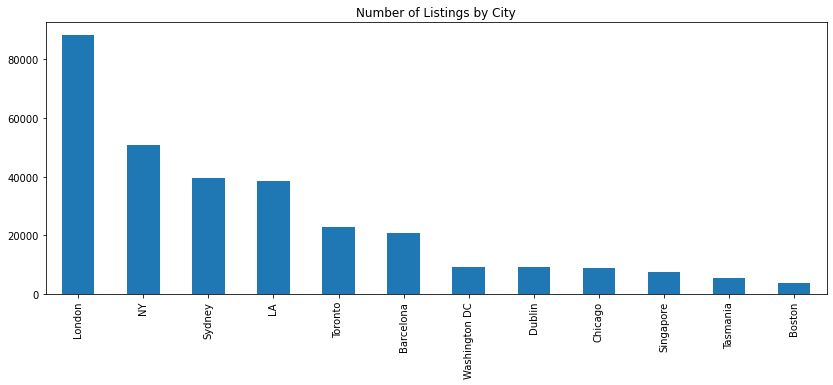

In [ ]:
plt.figure(figsize=(14,5))
df['city'].value_counts().plot.bar()
plt.title('Number of Listings by City')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
df['cancellation_policy'].value_counts()

strict_14_with_grace_period    123841
flexible                        85807
moderate                        71942
super_strict_60                  1233
super_strict_30                   699
strict                            549
luxury_moderate                   160
luxury_super_strict_95             19
luxury_no_refund                   16
luxury_super_strict_125            14
Name: cancellation_policy, dtype: int64

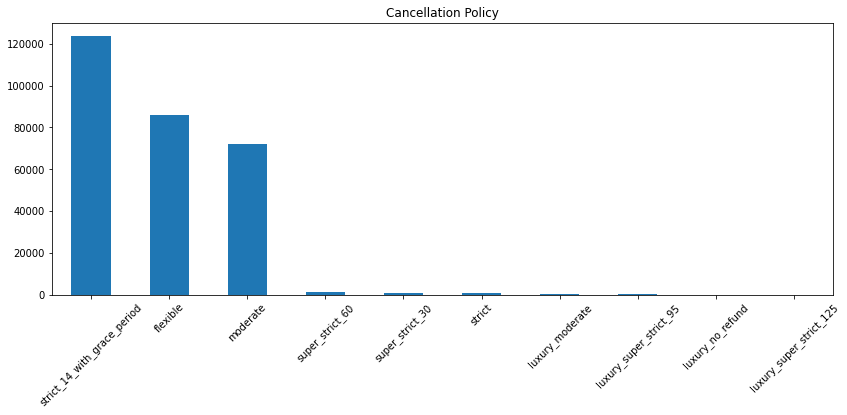

In [ ]:
plt.figure(figsize=(14,5))
plot = df['cancellation_policy'].value_counts().plot.bar()
plt.title('Cancellation Policy')
plt.xlabel('')
plt.ylabel('')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
df['room_type'].value_counts()

Entire home/apt    177035
Private room       119401
Shared room          5533
Hotel room           3014
Name: room_type, dtype: int64

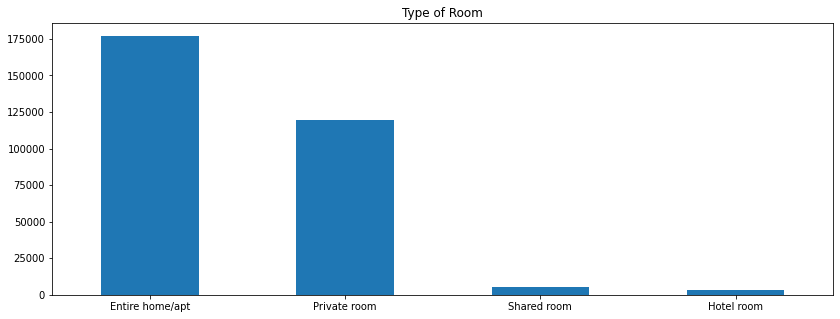

In [ ]:
plt.figure(figsize=(14,5))
plot = df['room_type'].value_counts().plot.bar()
plt.title('Type of Room')
plt.xlabel('')
plt.ylabel('')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.show()

In [ ]:
print(df['total_spending'].describe())
print('\n')
print('NAs:', df['total_spending'].isna().sum())

count    3.049830e+05
mean     1.507579e+03
std      2.005847e+04
min      0.000000e+00
25%      1.786200e+02
50%      4.150000e+02
75%      9.860000e+02
max      6.993060e+06
Name: total_spending, dtype: float64


NAs: 0


In [ ]:
spending_stats = []
for city in cities:
  temp = df[df['city']==city]
  temp2 = temp['total_spending'].describe()
  spending_stats.append(temp2)

In [ ]:
spending_stats_df = pd.DataFrame(spending_stats).T
spending_stats_df.columns = [cities]

In [ ]:
spending_stats_df

,Boston,Chicago,Dublin,London,LA,NY,Singapore,Sydney,Tasmania,Toronto,Washington DC,Barcelona
count,3799.000000,8804.000000,9143.000000,8.812900e+04,3.848100e+04,5.079600e+04,7.713000e+03,39670.000000,5447.000000,23004.000000,9294.000000,20703.000000
mean,5340.316512,1198.941753,845.389338,8.860075e+02,2.918198e+03,1.646544e+03,3.304068e+03,1515.816055,461.197681,1361.608814,1279.963389,765.585355
std,14516.729876,9164.184438,8473.899706,3.090935e+04,1.846065e+04,1.549928e+04,2.925312e+04,6548.808842,833.333035,9325.221074,4115.664109,3935.031343
min,44.000000,0.000000,20.000000,0.000000e+00,1.000000e+01,1.000000e+01,1.400000e+01,20.000000,26.000000,12.000000,10.000000,0.000000
25%,358.000000,180.000000,124.083421,1.320000e+02,2.600000e+02,2.220000e+02,2.636586e+02,278.000000,175.000000,230.000000,225.000000,70.000000
50%,1460.000000,410.000000,260.000000,2.986200e+02,7.000000e+02,4.750000e+02,7.800000e+02,580.000000,301.000000,478.555345,449.000000,162.000000
75%,6345.902136,890.000000,595.041711,6.350000e+02,2.725000e+03,1.070000e+03,2.241000e+03,1241.000000,540.000000,921.000000,981.884219,600.000000
max,720415.000000,799950.000000,558035.083421,6.993060e+06,2.372596e+06,2.340250e+06,1.825039e+06,720594.940103,37530.000000,839561.555345,198081.536878,324000.000000


Since I ultimately want to create a model that predicts prices I check their distribution. There are some clear outliers, so I remove them. 

In [ ]:
print(df['price'].describe())
print('\n')
print('NAs:', df['price'].isna().sum())

count    304983.000000
mean        164.429460
std         403.169329
min           0.000000
25%          59.000000
50%         100.000000
75%         168.000000
max       25000.000000
Name: price, dtype: float64


NAs: 0


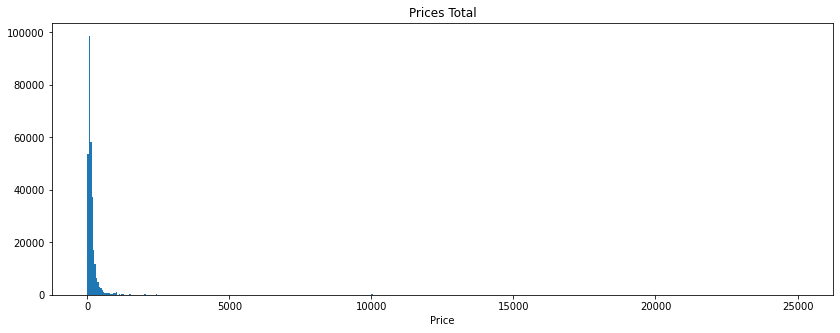

In [ ]:
plt.figure(figsize=(14,5))
df['price'].plot(kind='hist',bins=500)
plt.title('Prices Total')
plt.xlabel('Price')
plt.ylabel('')
plt.show()

In [ ]:
expensive = df[df['price']>= 300]
df = df[df['price']<=300]
expensive['city'].value_counts()

Sydney           6364
London           6110
LA               4804
NY               4141
Toronto          1747
Washington DC    1182
Chicago           948
Singapore         743
Dublin            657
Barcelona         528
Tasmania          521
Boston            389
Name: city, dtype: int64

90% of the prices fall between 0  and 300 dolars

In [ ]:
(expensive.shape[0]/304983)*100

9.224776462950395

There are some clear differences in price between cities. Tasmania, Sydney and Singapore seem to have high mean values, maybe because of the difference in currency. 

In [ ]:
prices_stats = []
for city in cities:
  temp = df[df['city']==city]
  temp2 = temp['price'].describe()
  prices_stats.append(temp2)

In [ ]:
prices_stats_df = pd.DataFrame(prices_stats).T
prices_stats_df.columns = [cities]

In [ ]:
prices_stats_df

,Boston,Chicago,Dublin,London,LA,NY,Singapore,Sydney,Tasmania,Toronto,Washington DC,Barcelona
count,3450.000000,7933.000000,8583.000000,82618.000000,34023.000000,47270.000000,7059.000000,33412.000000,4926.000000,21607.000000,8230.000000,20220.000000
mean,137.084638,111.650321,99.965164,93.523796,115.354143,117.857838,124.240686,125.414971,149.834957,110.873097,120.295990,70.133241
std,71.383295,66.480655,62.122634,61.542640,66.276173,66.113712,71.945075,65.251861,58.608869,63.697058,63.104751,52.039987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,15.000000,0.000000,0.000000,0.000000
25%,75.250000,60.000000,52.500000,45.000000,65.000000,65.000000,59.000000,70.000000,105.000000,59.000000,75.000000,34.000000
50%,128.500000,99.000000,80.000000,80.000000,100.000000,100.000000,114.000000,115.000000,147.000000,99.000000,103.000000,54.000000
75%,190.000000,150.000000,130.000000,123.000000,150.000000,155.000000,168.000000,170.000000,191.000000,149.000000,150.000000,91.000000
max,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000


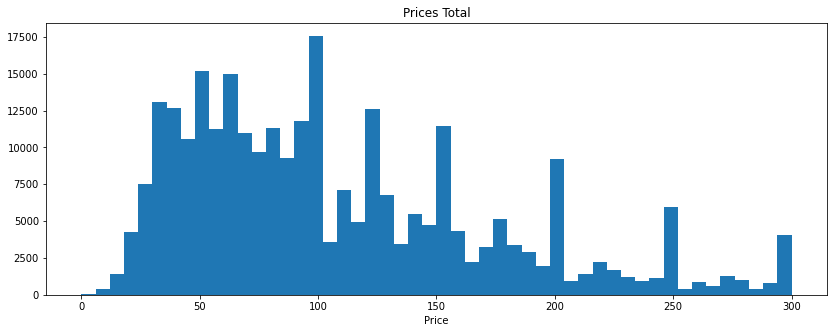

In [ ]:
plt.figure(figsize=(14,5))
df['price'].plot(kind='hist',bins=50)
plt.title('Prices Total')
plt.xlabel('Price')
plt.ylabel('')
plt.show()

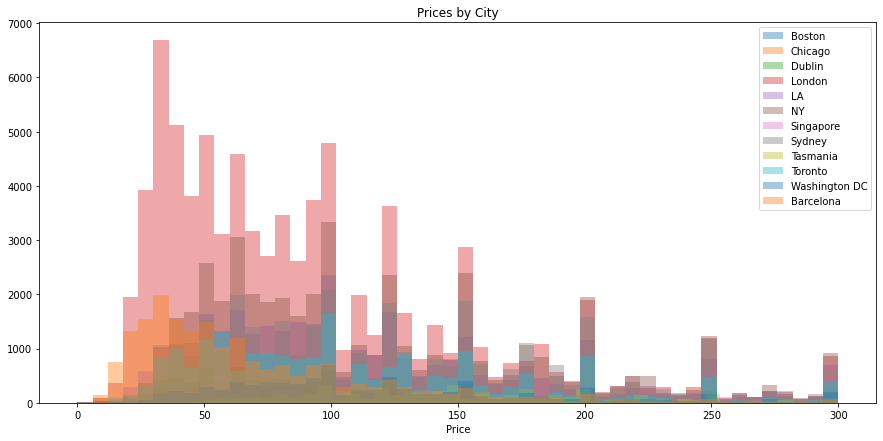

In [ ]:
def plotcity_one(city):
  temp = df[df['city'] == city]
  #plt.figure()
  temp['price'].plot(kind='hist',bins=50, alpha=0.4, figsize=(15,7))
  plt.title('Prices by City')
  plt.xlabel('Price')
  plt.ylabel('')

for city in cities:
    plotcity_one(city)

plt.legend(cities)
plt.show()

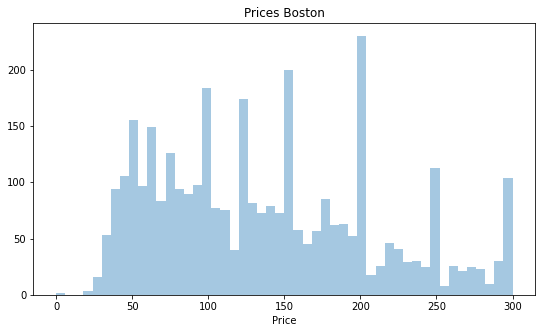

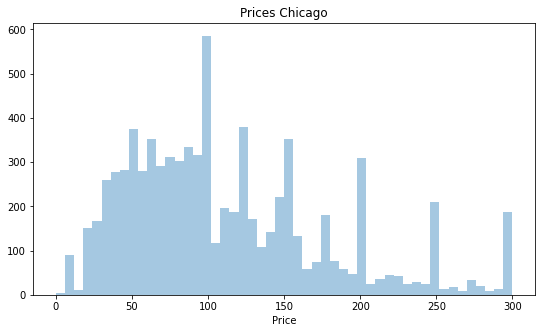

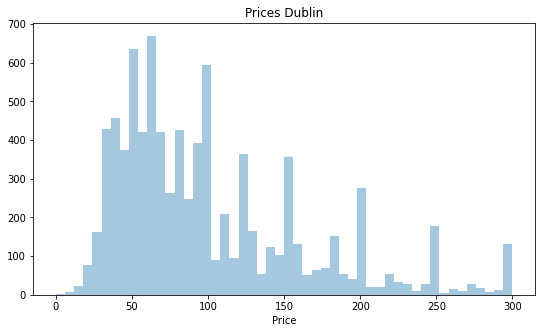

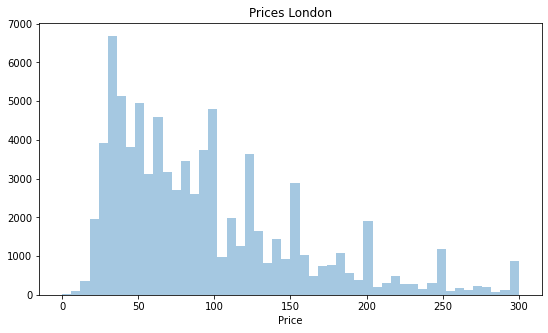

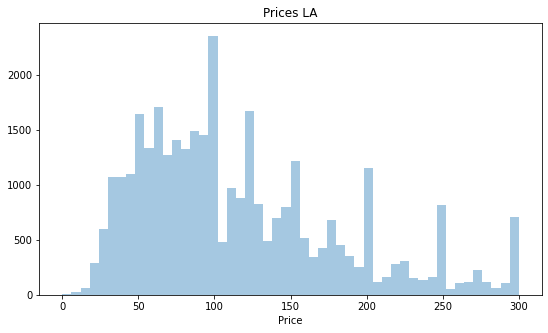

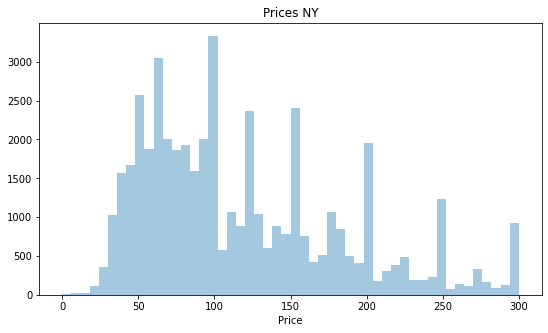

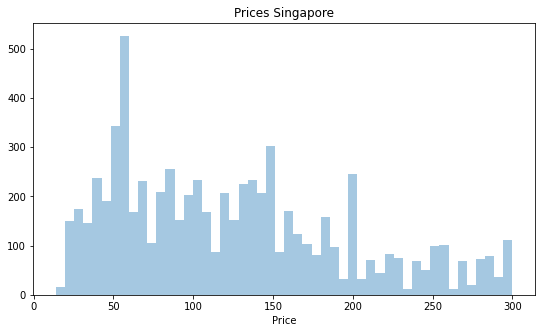

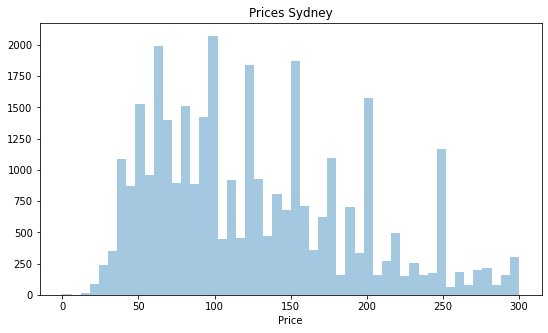

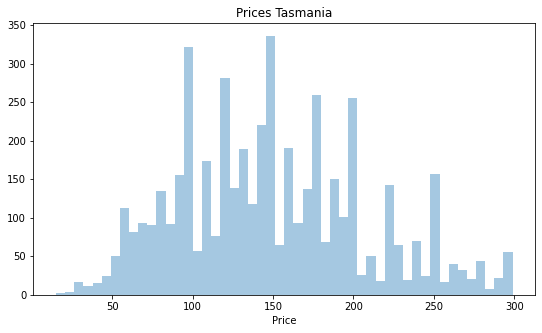

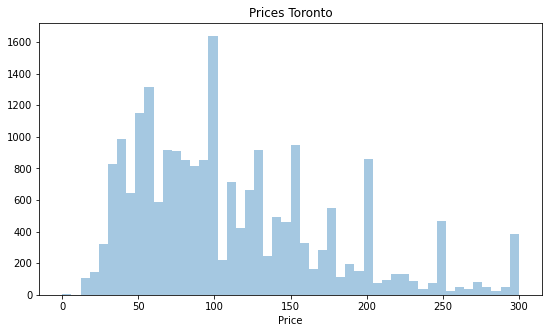

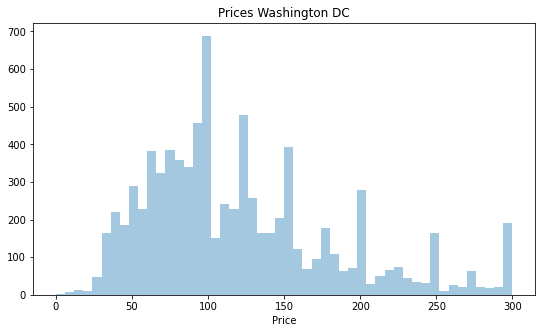

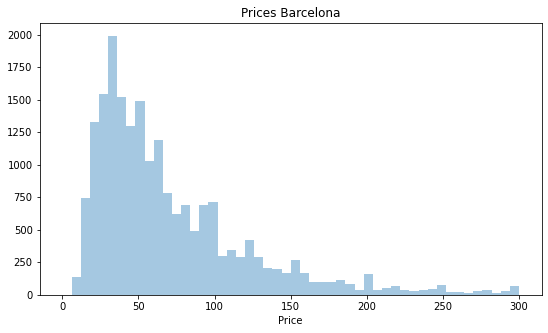

In [ ]:
def plotcity(city):
  temp = df[df['city'] == city]
  plt.figure()
  temp['price'].plot(kind='hist',bins=50, alpha=0.4, figsize=(9,5))
  plt.title('Prices '+str(city))
  plt.xlabel('Price')
  plt.ylabel('')

for city in cities:
    plotcity(city)

plt.show()

Visualize the distribution of listings by price and neighbourhood

Manhattan        19837
Brooklyn         19696
Queens            6143
Bronx             1226
Staten Island      368
Name: neighbourhood_group_cleansed, dtype: int64


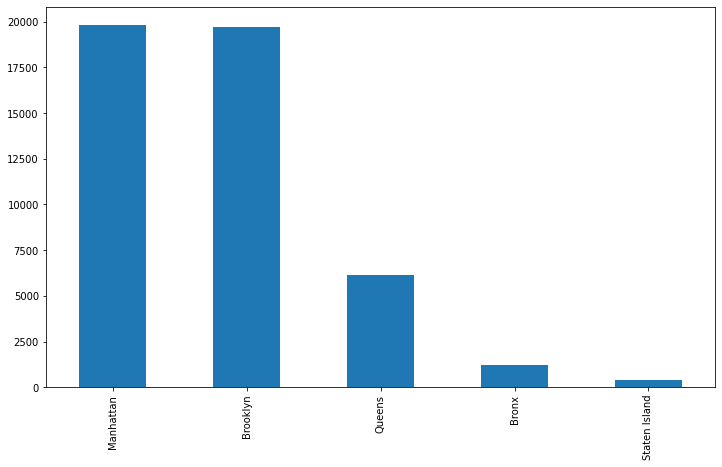

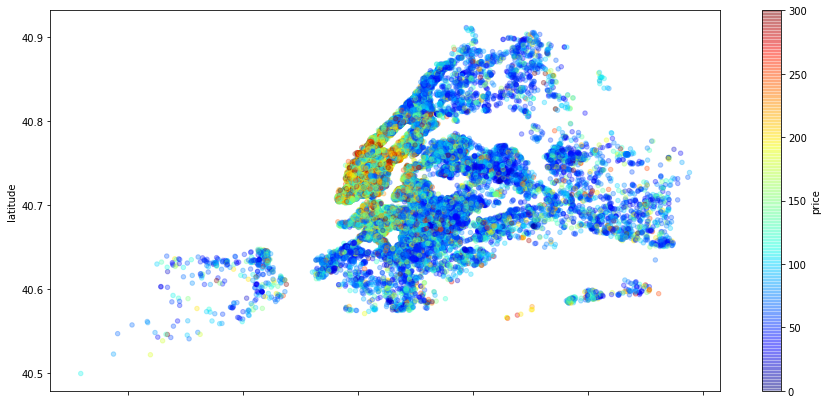

In [ ]:
df_ny = df[df['city']=='NY']
print(df_ny['neighbourhood_group_cleansed'].value_counts())
df_ny['neighbourhood_group_cleansed'].value_counts().plot.bar(figsize=(12,7))
df_ny.plot(kind='scatter', x='longitude',y='latitude',alpha=0.3,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

Westminster               8594
Tower Hamlets             8351
Hackney                   6201
Camden                    5831
Kensington and Chelsea    5212
Islington                 4905
Lambeth                   4840
Southwark                 4823
Wandsworth                4023
Hammersmith and Fulham    3988
Name: neighbourhood_cleansed, dtype: int64


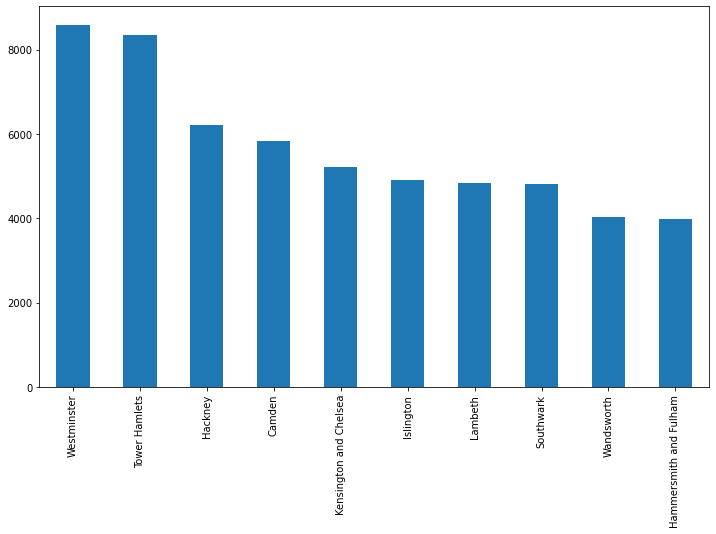

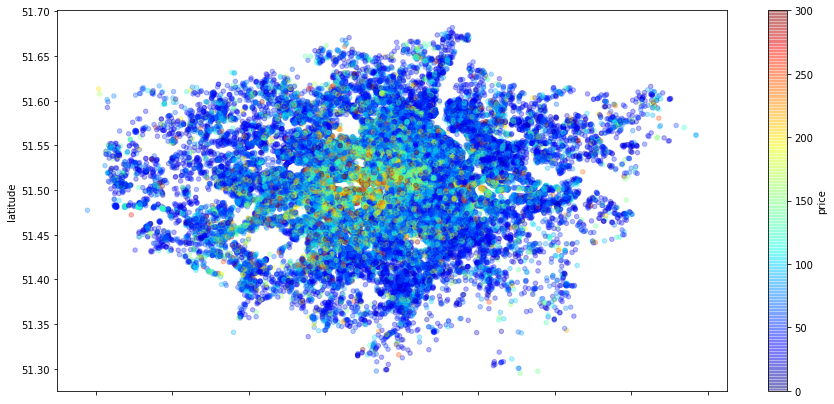

In [ ]:
df_london = df[df['city']=='London']
print(df_london['neighbourhood_cleansed'].value_counts().head(10))
df_london['neighbourhood_cleansed'].value_counts().head(10).plot.bar(figsize=(12,7))
df_london.plot(kind='scatter', x='longitude',y='latitude',alpha=0.3,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

West Town          928
Near North Side    738
Lake View          618
Logan Square       527
Near West Side     435
Loop               432
Lincoln Park       374
Lower West Side    255
Uptown             241
Edgewater          226
Name: neighbourhood_cleansed, dtype: int64


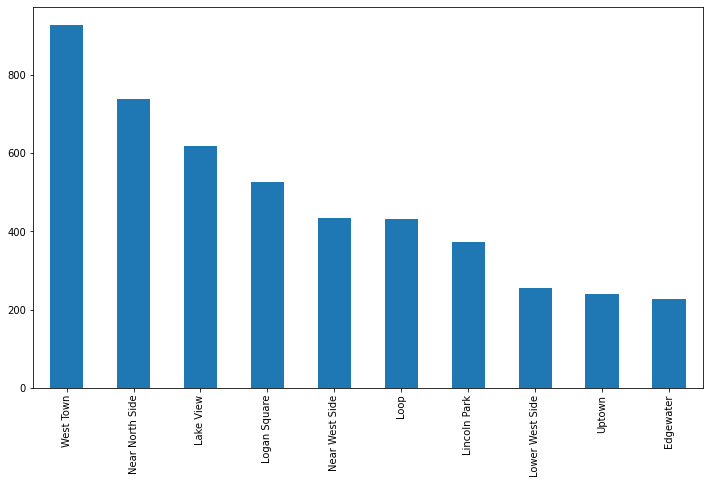

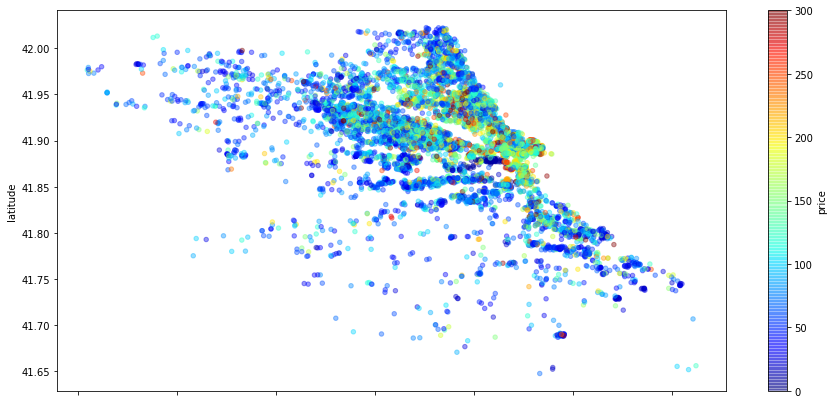

In [ ]:
df_chi = df[df['city']== 'Chicago']
print(df_chi['neighbourhood_cleansed'].value_counts().head(10))
df_chi['neighbourhood_cleansed'].value_counts().head(10).plot.bar(figsize=(12,7))
df_chi.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

Hobart                  1100
Launceston               519
Glamorgan/Spring Bay     366
Clarence                 333
Kingborough              315
Break O'Day              280
Huon Valley              156
West Tamar               145
Kentish                  137
Tasman                   134
Name: neighbourhood_cleansed, dtype: int64


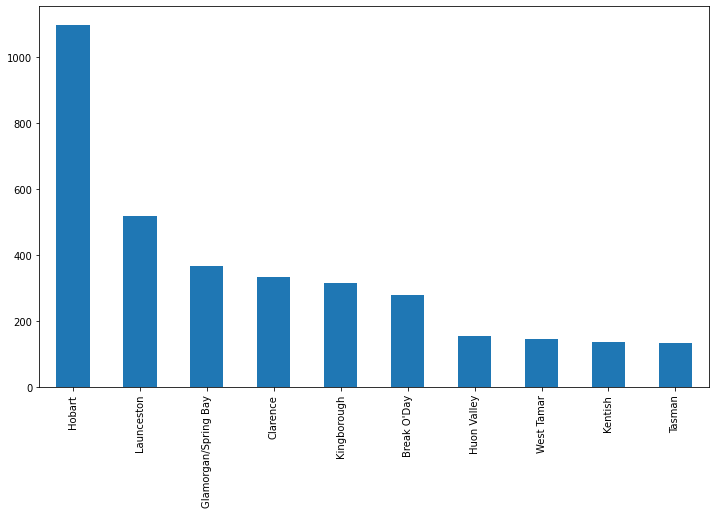

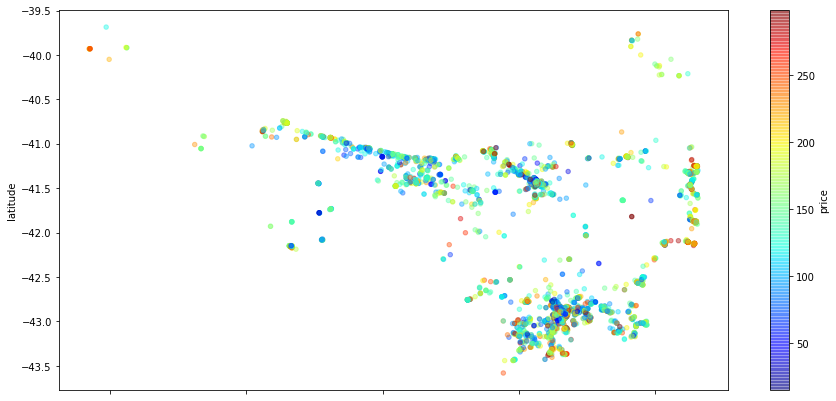

In [ ]:
df_tas = df[df['city']== 'Tasmania']
print(df_tas['neighbourhood_cleansed'].value_counts().head(10))
df_tas['neighbourhood_cleansed'].value_counts().head(10).plot.bar(figsize=(12,7))
df_tas.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

Central Region       5683
West Region           461
East Region           433
North-East Region     294
North Region          188
Name: neighbourhood_group_cleansed, dtype: int64


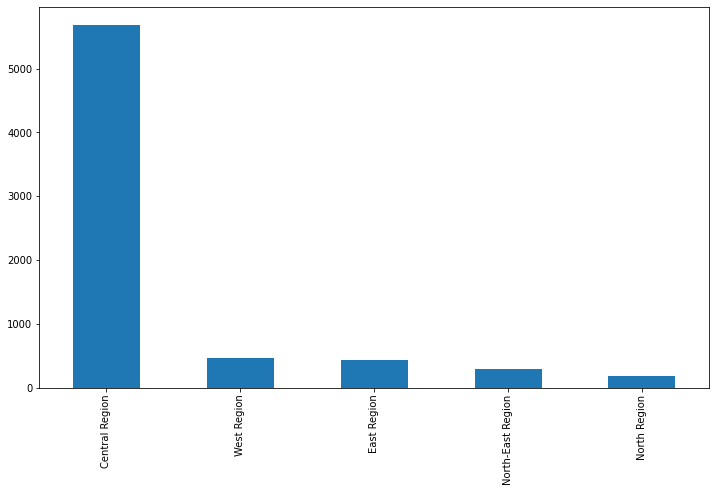

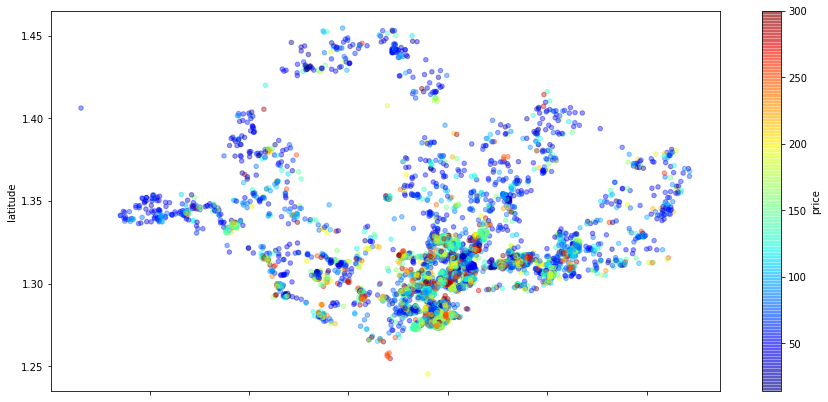

In [ ]:
df_sin = df[df['city']== 'Singapore']
print(df_sin['neighbourhood_group_cleansed'].value_counts())
df_sin['neighbourhood_group_cleansed'].value_counts().plot.bar(figsize=(12,7))
df_sin.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

Eixample               6803
Ciutat Vella           4751
Sants-Montjuïc         2336
Sant Martí             2054
Gràcia                 1745
Sarrià-Sant Gervasi     824
Horta-Guinardó          655
Les Corts               436
Sant Andreu             333
Nou Barris              283
Name: neighbourhood_group_cleansed, dtype: int64


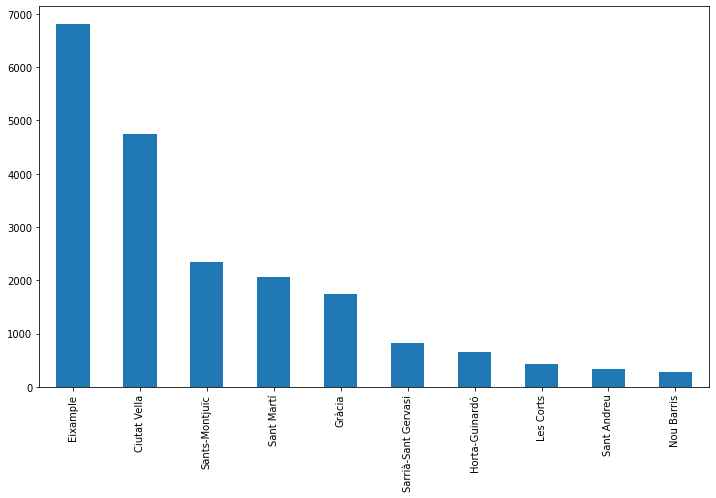

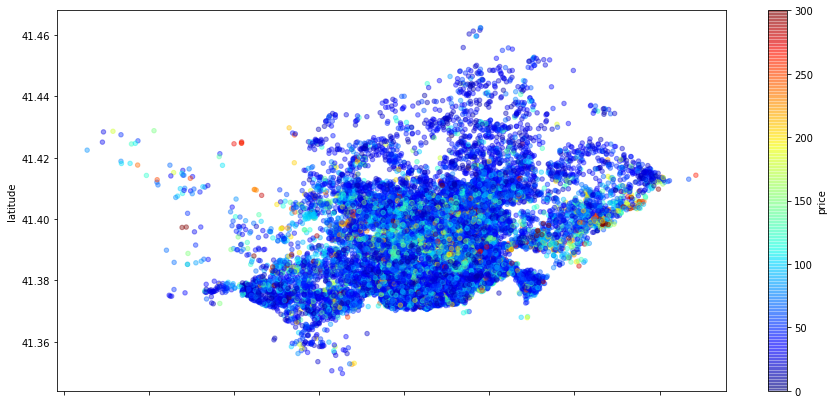

In [ ]:
df_bcn = df[df['city']== 'Barcelona']
print(df_bcn['neighbourhood_group_cleansed'].value_counts())
df_bcn['neighbourhood_group_cleansed'].value_counts().plot.bar(figsize=(12,7))
df_bcn.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

Check availability by city

In [ ]:
availability = df['availability_365']

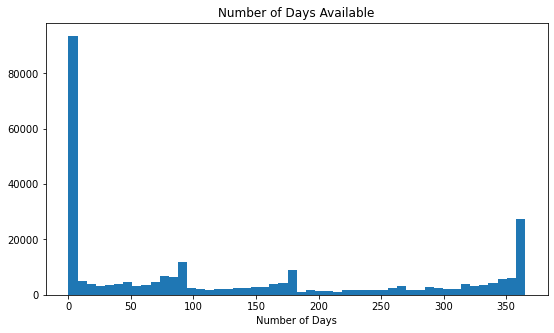

In [ ]:
availability.plot(kind='hist', bins=50, figsize=(9,5))
plt.title('Number of Days Available')
plt.xlabel('Number of Days')
plt.ylabel('')
plt.show()

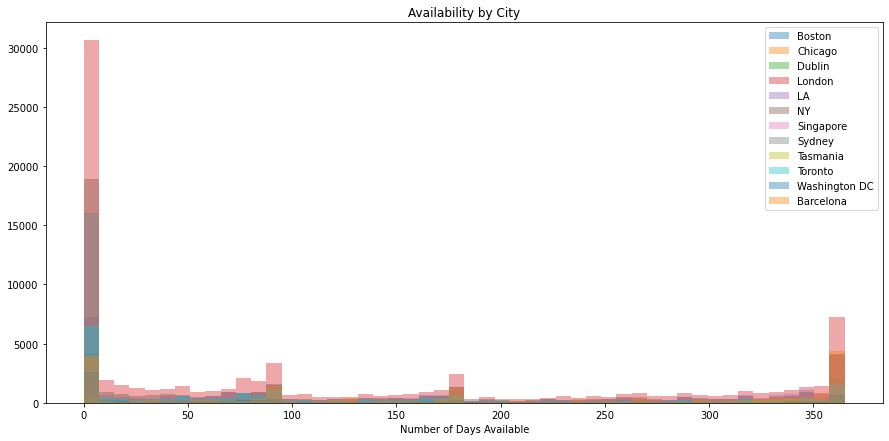

In [ ]:
def plotavai_one(city):
  temp = df[df['city'] == city]
  #plt.figure()
  temp['availability_365'].plot(kind='hist',bins=50, alpha=0.4, figsize=(15,7))
  plt.title('Availability by City')
  plt.xlabel('Number of Days Available')
  plt.ylabel('')

for city in cities:
    plotavai_one(city)

plt.legend(cities)
plt.show()

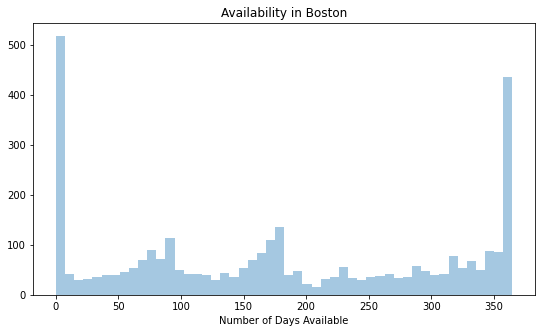

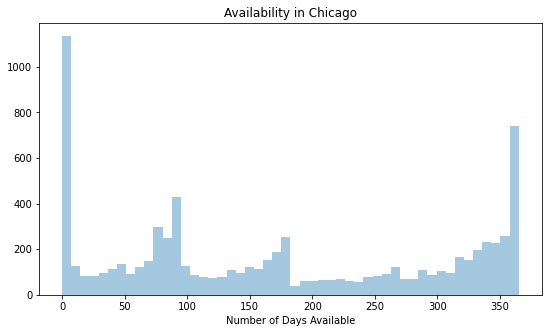

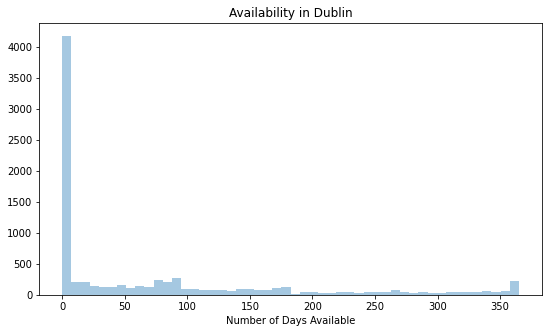

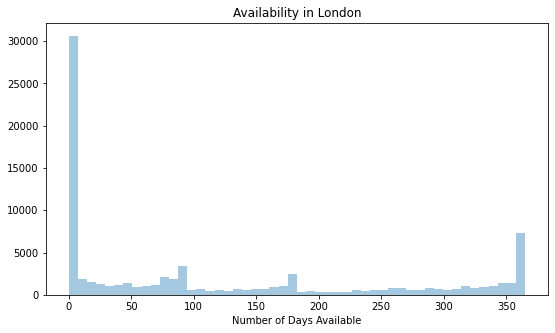

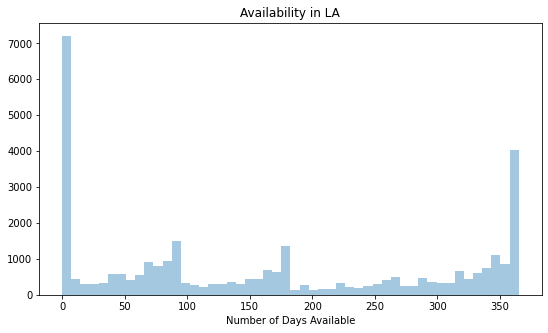

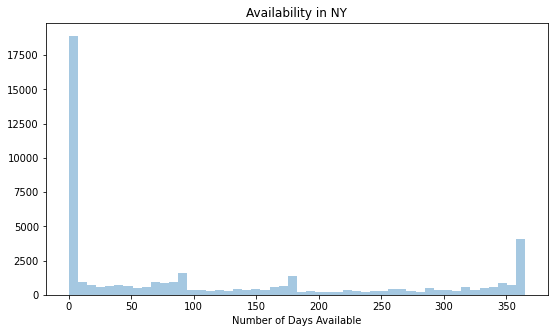

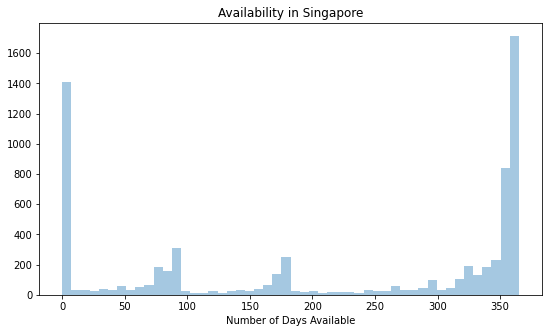

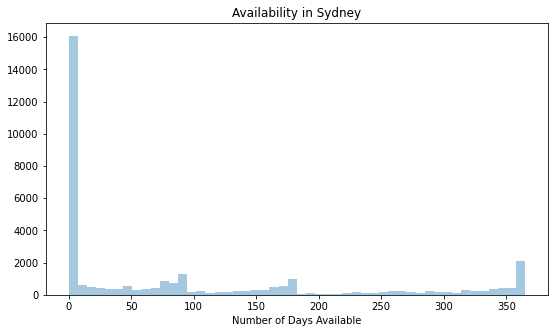

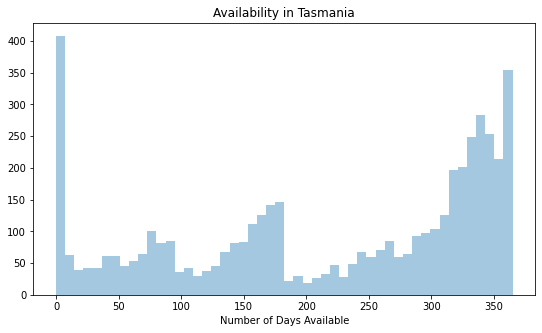

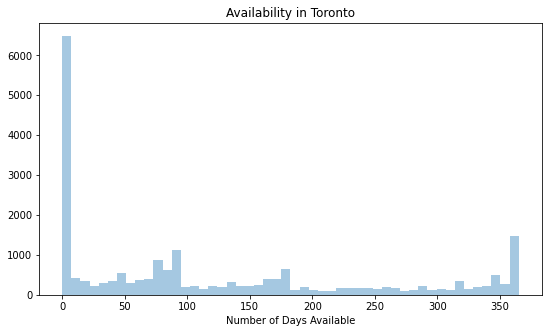

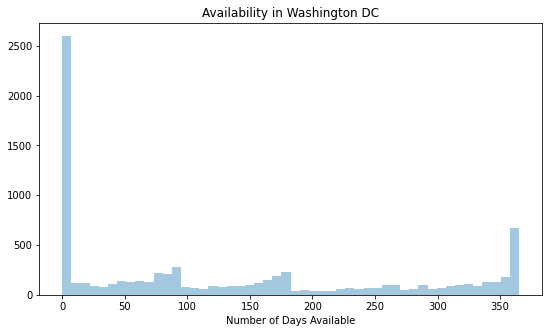

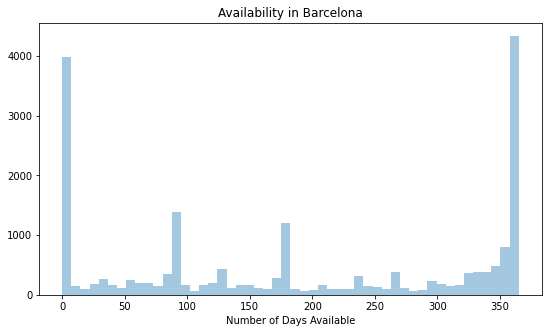

In [ ]:
def plotavai(city):
  temp = df[df['city'] == city]
  plt.figure()
  temp['availability_365'].plot(kind='hist',bins=50, alpha=0.4, figsize=(9,5))
  plt.title('Availability in '+str(city))
  plt.xlabel('Number of Days Available')
  plt.ylabel('')

for city in cities:
    plotavai(city)

plt.show()

Visualize prices by city and neighbourhood or city and district

In [ ]:
df_bcn['neighbourhood_group_cleansed'].value_counts()

Eixample               6803
Ciutat Vella           4751
Sants-Montjuïc         2336
Sant Martí             2054
Gràcia                 1745
Sarrià-Sant Gervasi     824
Horta-Guinardó          655
Les Corts               436
Sant Andreu             333
Nou Barris              283
Name: neighbourhood_group_cleansed, dtype: int64

In [ ]:
top_neis = []
for city in cities:
  temp = df[df['city']==city]
  temp2 = temp['neighbourhood_cleansed'].value_counts().reset_index().head(5)
  temp2['city'] = city
  top_neis.append(temp2)

In [ ]:
top_neis_df = pd.concat(top_neis)

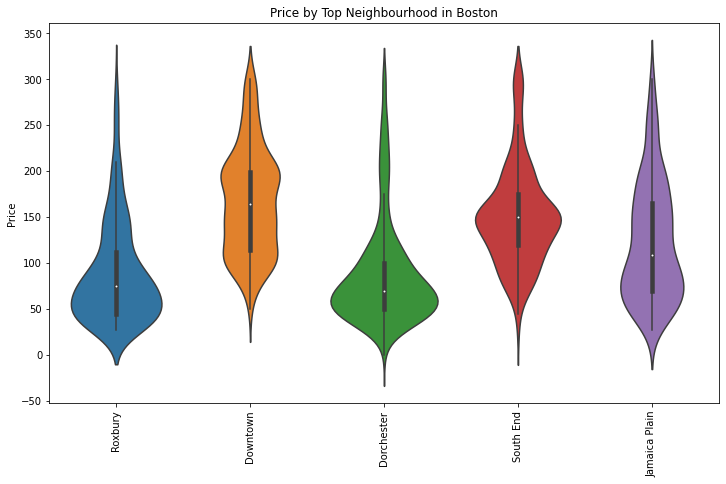

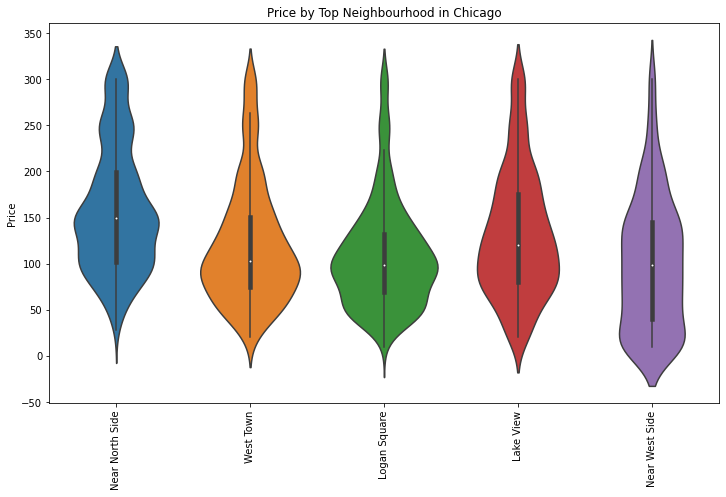

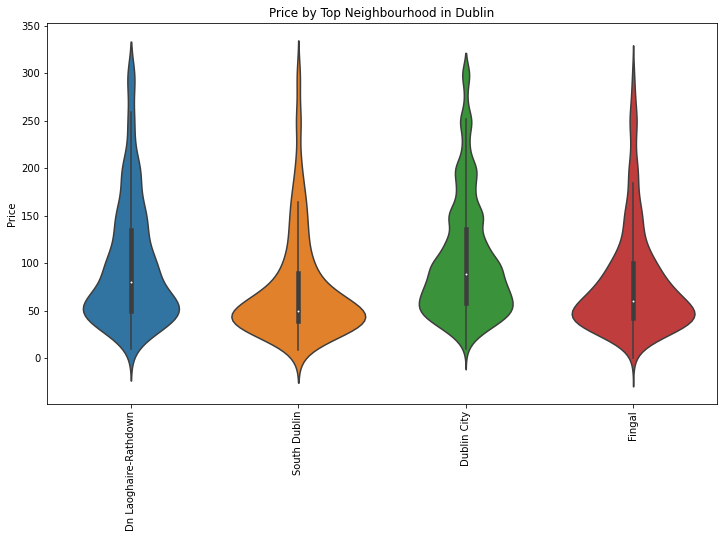

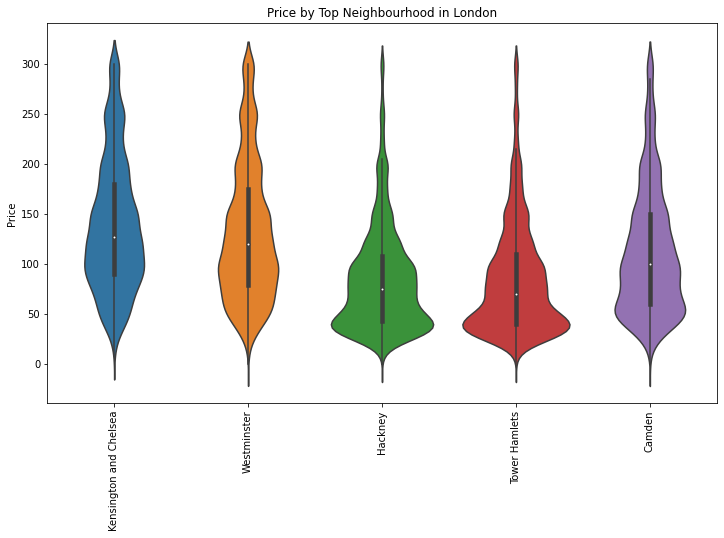

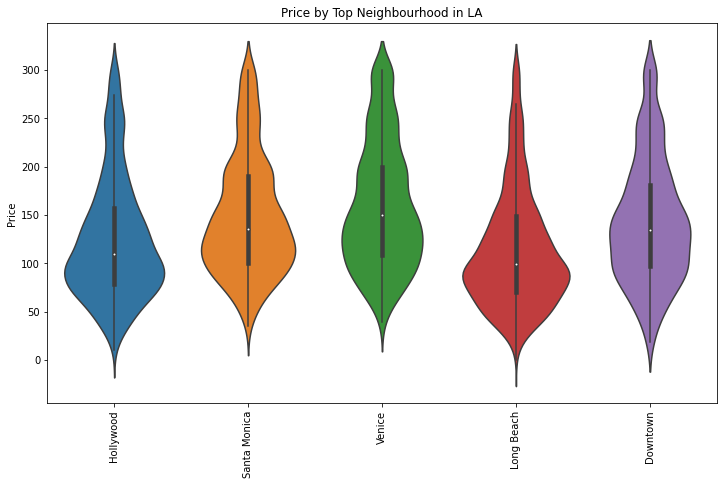

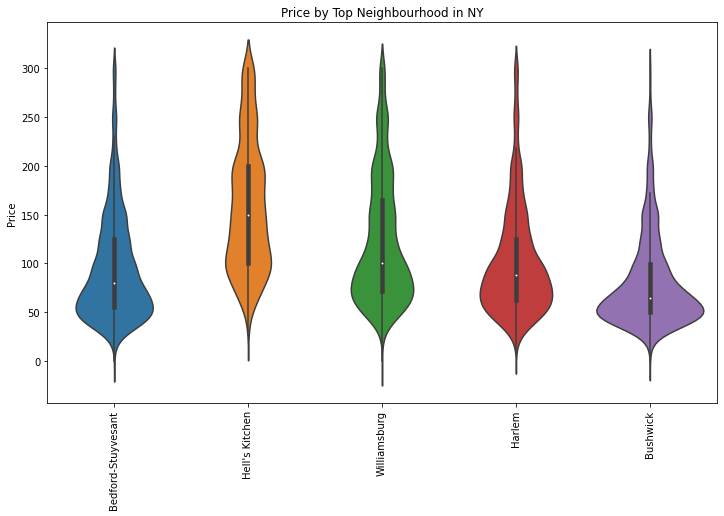

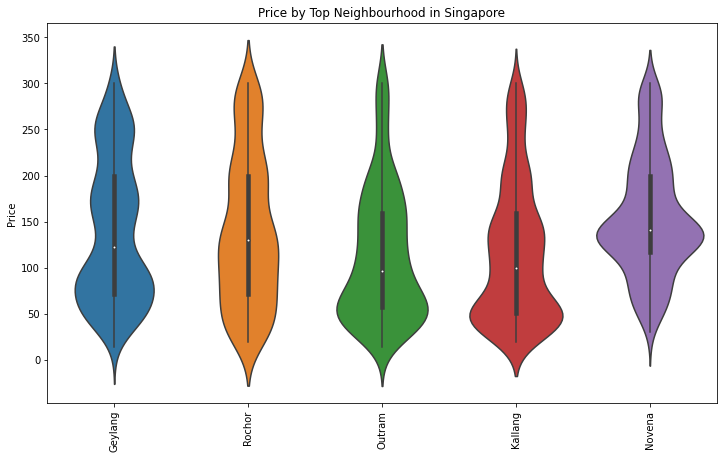

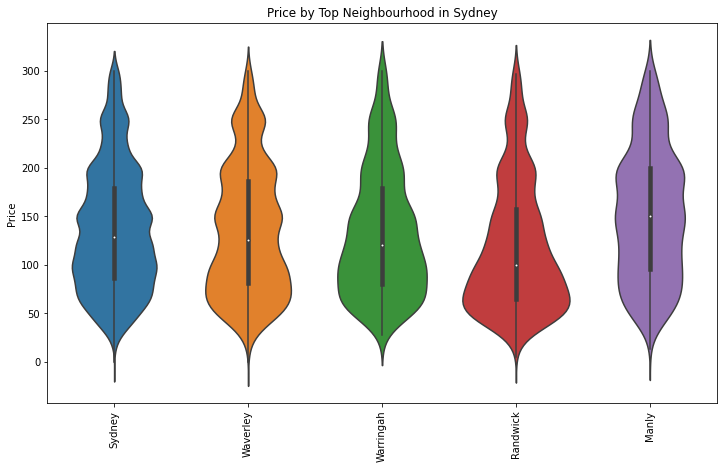

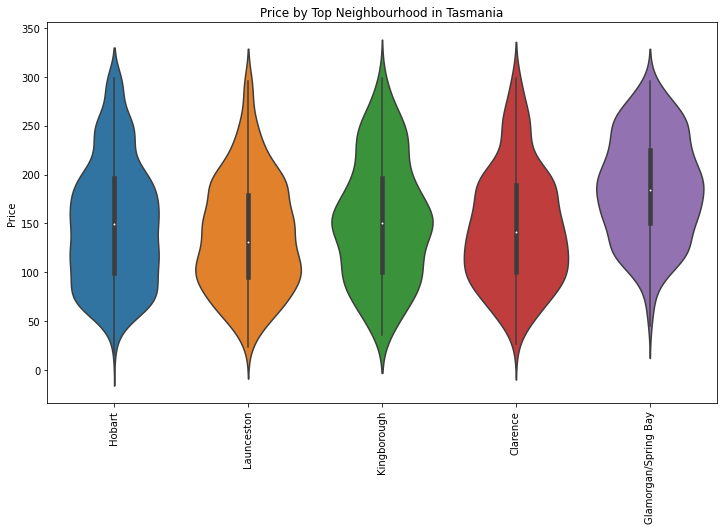

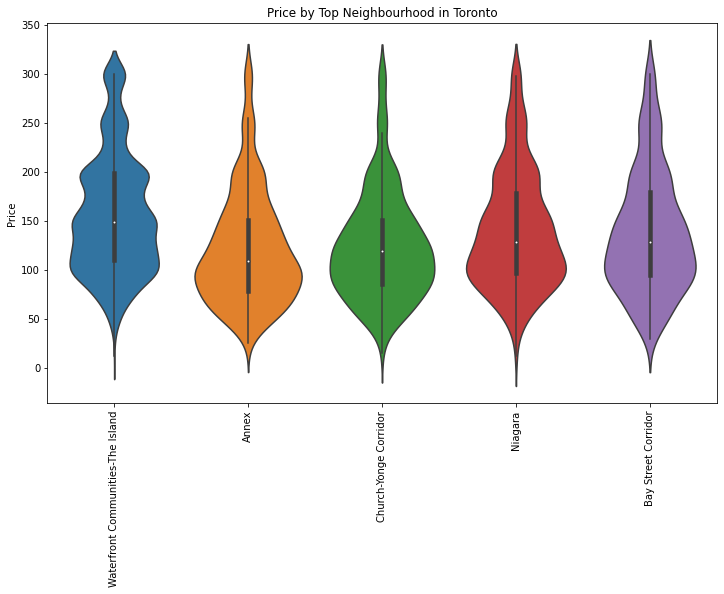

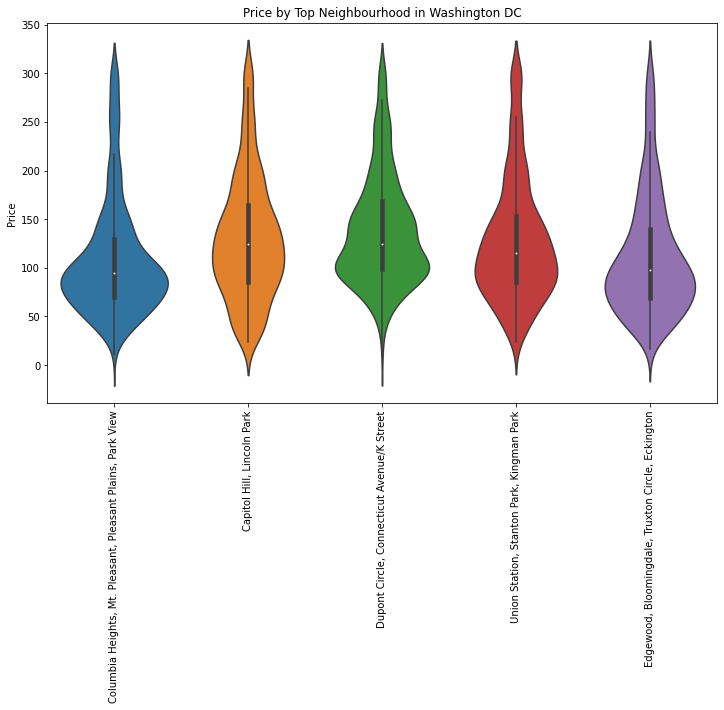

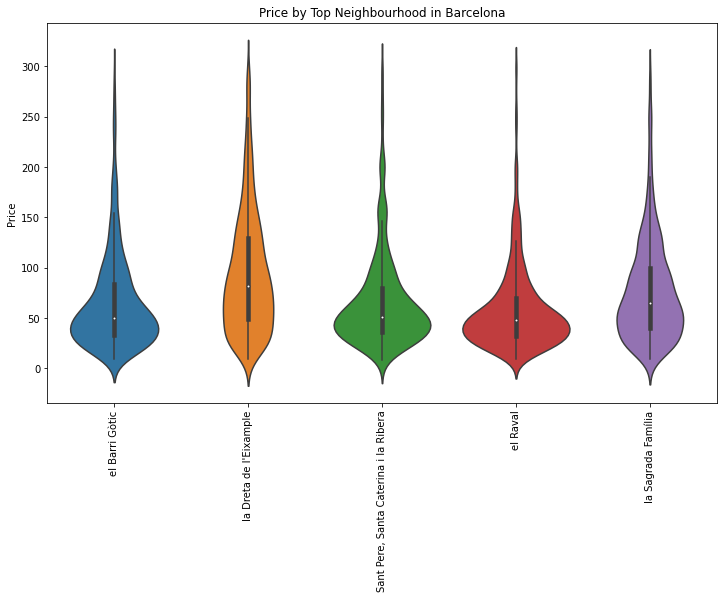

In [ ]:
def plotviolin(city):
  temp = df[df['city'] == city]
  top_nei = top_neis_df[top_neis_df['city']== city]
  temp2 = temp[temp['neighbourhood_cleansed'].isin(top_nei['index'])]
  plt.figure(figsize=(12,7))
  plot = sns.violinplot(data=temp2,x='neighbourhood_cleansed',y='price')
  plt.title('Price by Top Neighbourhood in '+str(city))
  plt.xlabel('')
  plt.ylabel('Price')
  plt.setp(plot.get_xticklabels(), rotation=90)

for city in cities:
    plotviolin(city)

plt.show()

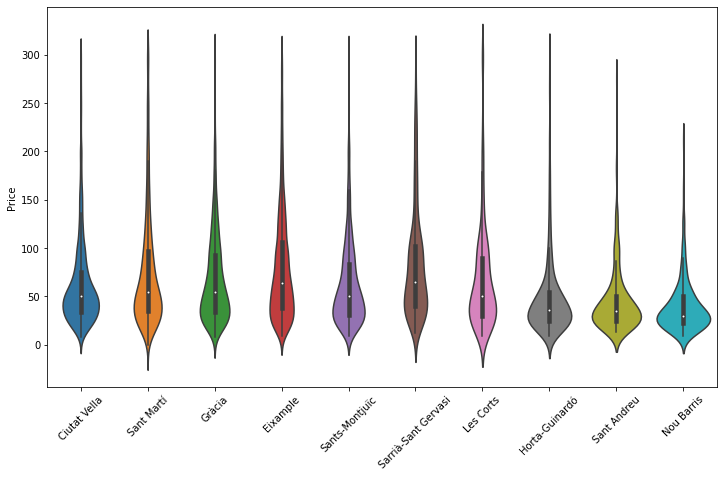

In [ ]:
plt.figure(figsize=(12,7))
plot = sns.violinplot(data=df_bcn,x='neighbourhood_group_cleansed',y='price')
plt.xlabel('')
plt.ylabel('Price')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

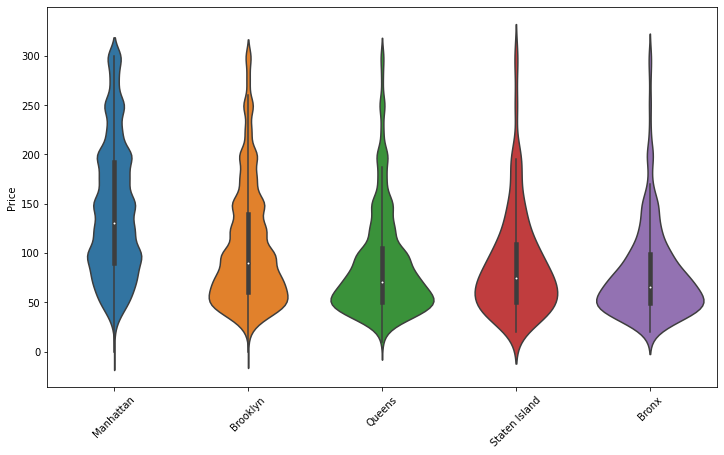

In [ ]:
plt.figure(figsize=(12,7))
plot = sns.violinplot(data=df_ny,x='neighbourhood_group_cleansed',y='price')
plt.xlabel('')
plt.ylabel('Price')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

Visualize price by type of acommodation

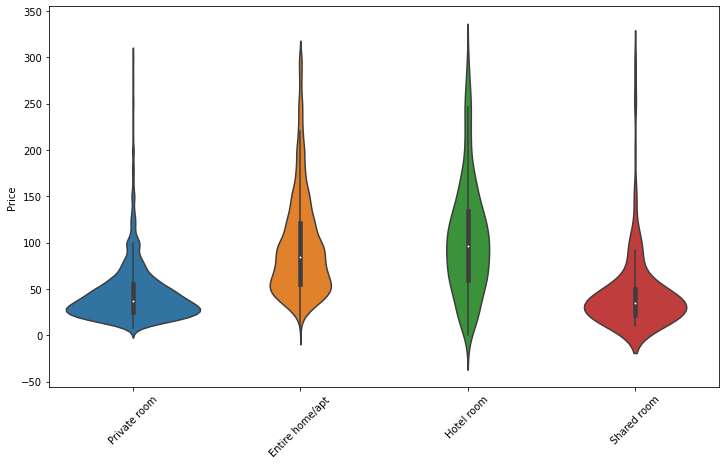

In [ ]:
plt.figure(figsize=(12,7))
plot = sns.violinplot(data=df_bcn,x='room_type',y='price')
plt.xlabel('')
plt.ylabel('Price')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

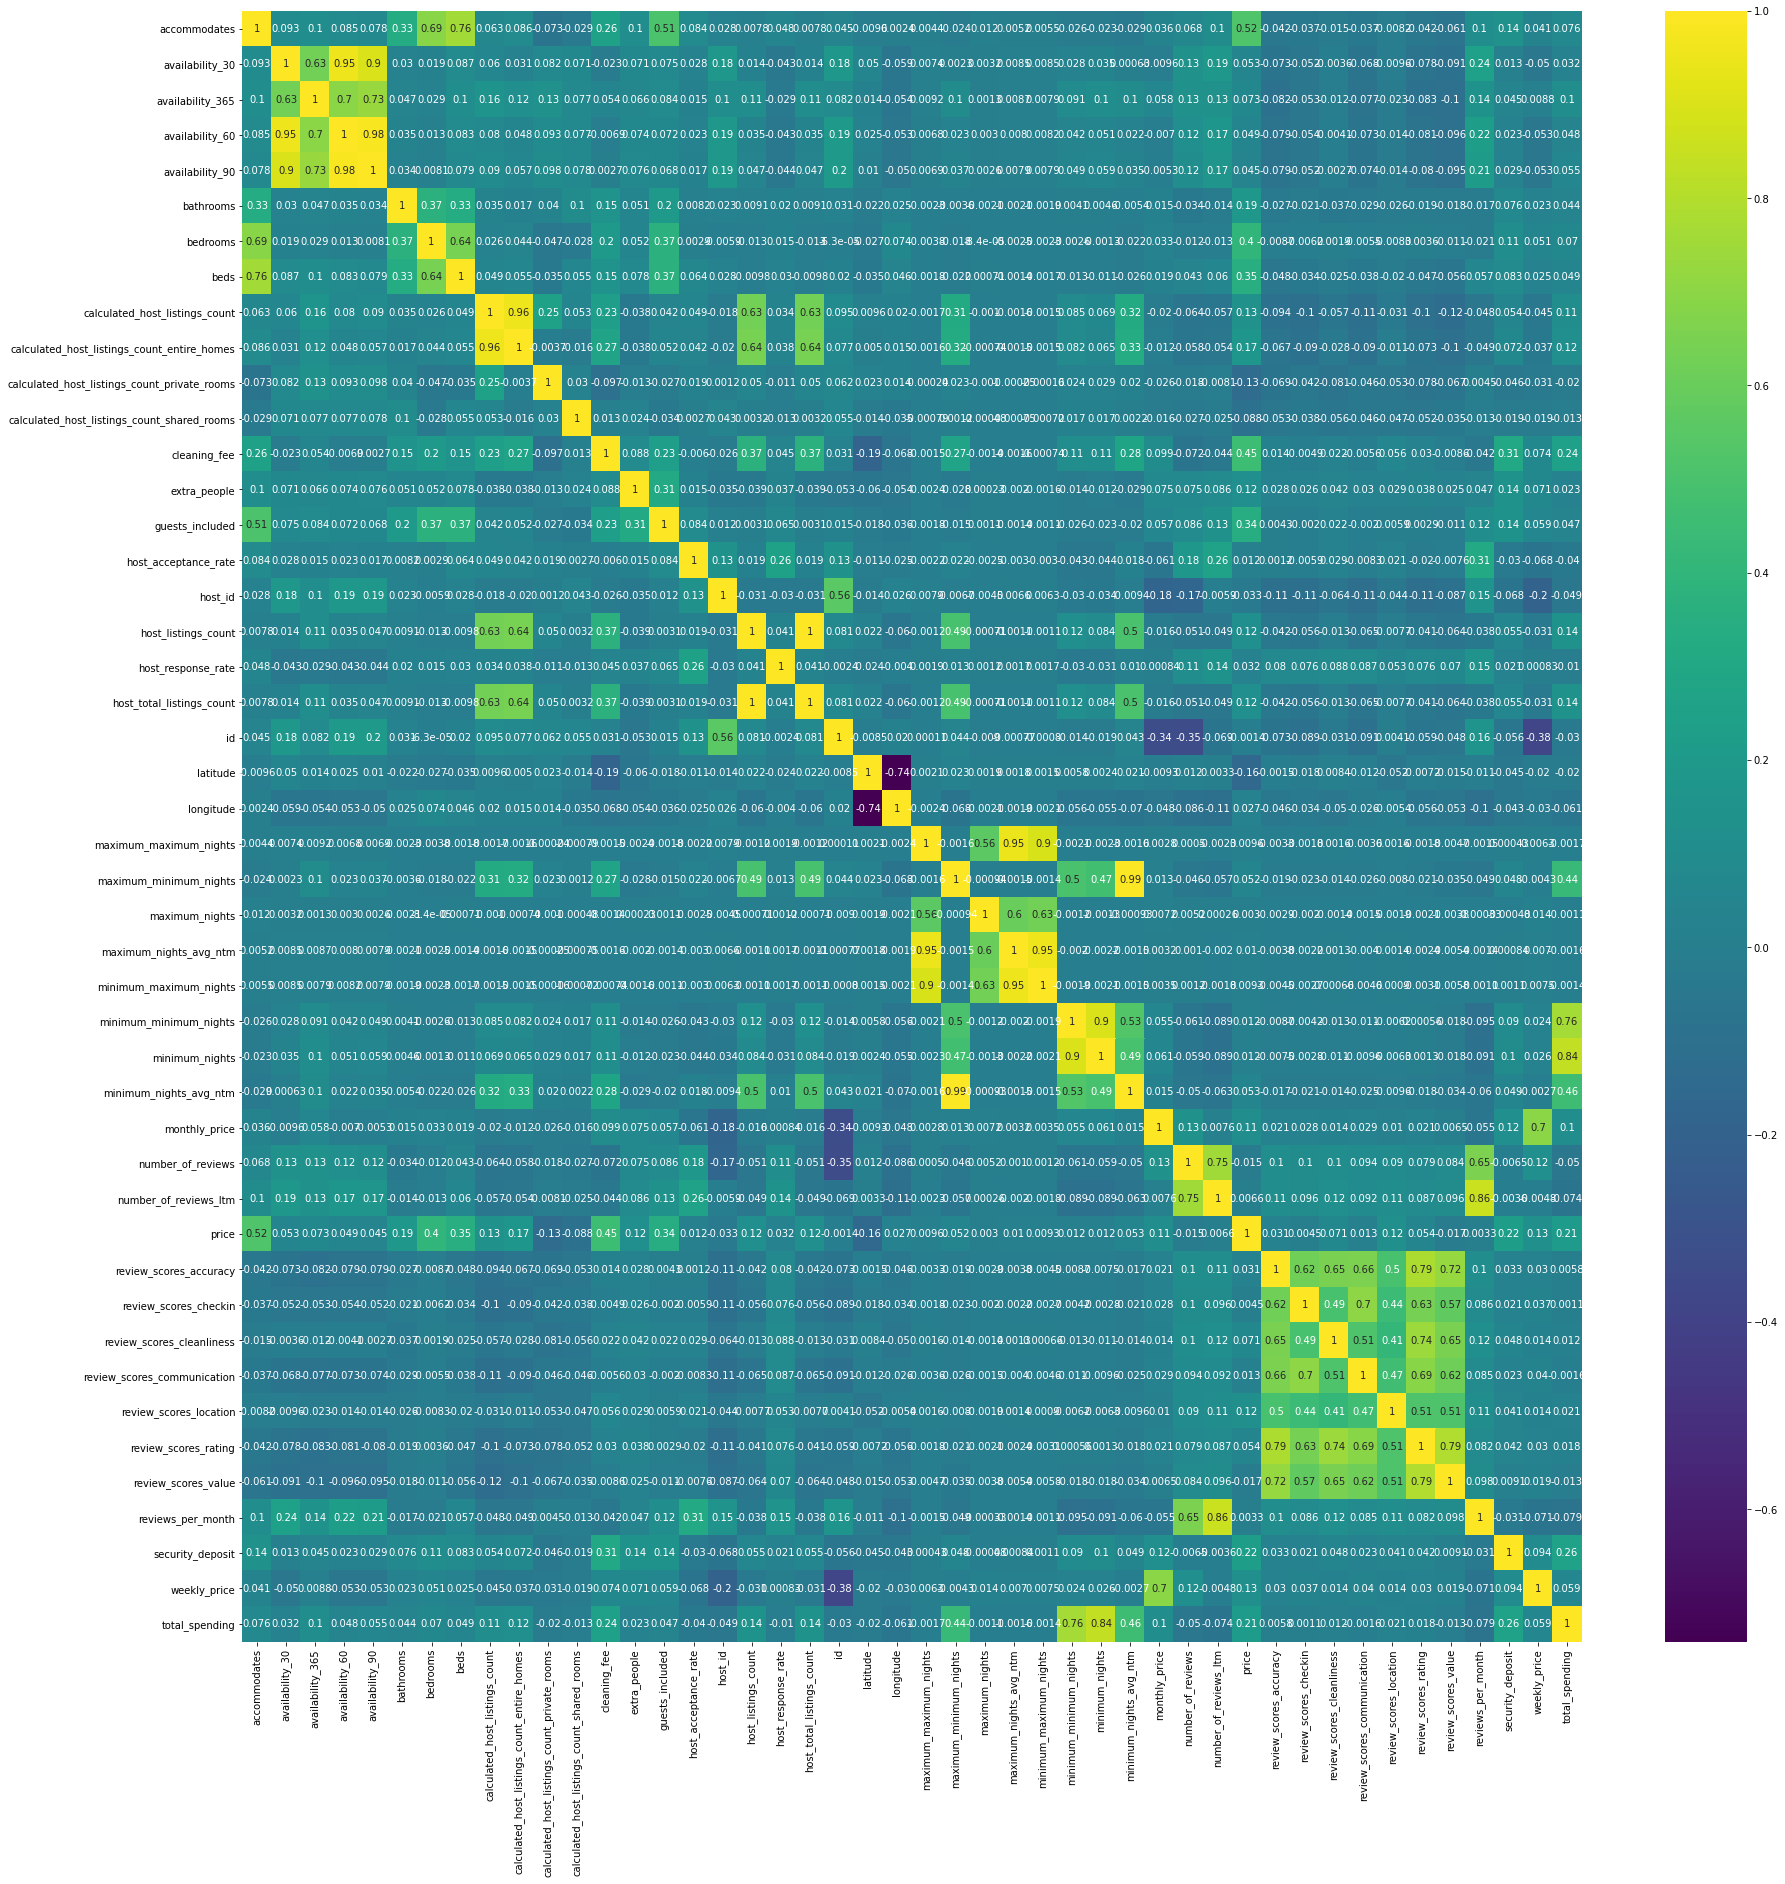

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.select_dtypes(include =['int','float']).corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
  df.select_dtypes(include =['int','float']).corr()['total_spending'].sort_values(ascending=False)

total_spending                                  1.000000
minimum_nights                                  0.839078
minimum_minimum_nights                          0.764173
minimum_nights_avg_ntm                          0.457260
maximum_minimum_nights                          0.435362
security_deposit                                0.260470
cleaning_fee                                    0.244669
price                                           0.207297
host_listings_count                             0.143488
host_total_listings_count                       0.143488
calculated_host_listings_count_entire_homes     0.119965
calculated_host_listings_count                  0.108465
monthly_price                                   0.103277
availability_365                                0.102243
accommodates                                    0.075573
bedrooms                                        0.070258
weekly_price                                    0.058862
availability_90                

In [ ]:
  df.select_dtypes(include =['int','float']).corr()['price'].sort_values(ascending=False)

price                                           1.000000
accommodates                                    0.518285
cleaning_fee                                    0.449670
bedrooms                                        0.397261
beds                                            0.353392
guests_included                                 0.343189
security_deposit                                0.221199
total_spending                                  0.207297
bathrooms                                       0.189263
calculated_host_listings_count_entire_homes     0.172367
calculated_host_listings_count                  0.129379
weekly_price                                    0.125875
review_scores_location                          0.124383
host_total_listings_count                       0.122079
host_listings_count                             0.122079
extra_people                                    0.121869
monthly_price                                   0.110993
availability_365               

## 3. Pre-Process

In the pre-process stage I shuffled the data because it was ordered by city. I also made to have all neighbourhoods present in the training and testing data to make sure my data had the same shape. I standardized the numerical values and one-hot encoded to categorical ones. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random
import string
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
random.seed(42)
df_shuffled = shuffle(df)
df_shuffled['city'].head()

139296         LA
91645      London
186759         NY
214210     Sydney
264407    Toronto
Name: city, dtype: object

In [ ]:
one_nei = df['neighbourhood_cleansed'].value_counts().tail(16)
one_nei_list = list(one_nei.index)

In [ ]:
for i in one_nei_list:
  temp = df['neighbourhood_cleansed'] == i
  temp2 = temp[temp].index.values
  df.drop(temp2, axis=0,inplace=True)

In [ ]:
df['neighbourhood_cleansed'].value_counts()

Sydney                   9331
Westminster              8594
Tower Hamlets            8351
Dublin City              6533
Hackney                  6201
                         ... 
West Englewood              2
Ridge Route                 2
Lighthouse Hill             2
Desert View Highlands       2
Howland Hook                2
Name: neighbourhood_cleansed, Length: 948, dtype: int64

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
for train_index, test_index in split.split(df, df['neighbourhood_cleansed']):
  train_set = df.iloc[train_index]
  test_set = df.iloc[test_index]

In [ ]:
print(train_set.shape)
print(test_set.shape)

(223448, 103)
(55863, 103)


Train

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_cat_train = train_set.select_dtypes(exclude=['int', 'float'])

In [ ]:
df_cat_train.columns

Index(['access', 'amenities', 'bathrooms_text', 'bed_type',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'country', 'country_code', 'description', 'experiences_offered',
       'first_review', 'has_availability', 'host_about',
       'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
       'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_time', 'host_since', 'host_thumbnail_url', 'host_url',
       'host_verifications', 'house_rules', 'instant_bookable', 'interaction',
       'is_business_travel_ready', 'is_location_exact', 'jurisdiction_names',
       'last_review', 'last_scraped', 'license', 'listing_url', 'market',
       'name', 'neighborhood_overview', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'notes',
       'picture_url', 'property_type', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'requires_license

In [ ]:
df_cat_train = df_cat_train[['cancellation_policy','city','neighbourhood_cleansed','room_type']]
df_num_train = train_set.select_dtypes(include=['int', 'float'])

In [ ]:
df_cat_train.isna().sum()

cancellation_policy       16174
city                          0
neighbourhood_cleansed        0
room_type                     0
dtype: int64

In [ ]:
df_cat_train['cancellation_policy'] = df_cat_train['cancellation_policy'].replace(np.nan, 'No Policy', regex=True)
df_cat_train.shape

(223448, 4)

In [ ]:
df_cat_train.isna().sum()

cancellation_policy       0
city                      0
neighbourhood_cleansed    0
room_type                 0
dtype: int64

In [ ]:
print(df_num_train.shape)
print(df_cat_train.shape)

(223448, 46)
(223448, 4)


In [ ]:
train_set = pd.merge(df_num_train, df_cat_train, on=df_num_train.index)

In [ ]:
train_set.columns

Index(['key_0', 'accommodates', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'cleaning_fee',
       'extra_people', 'guests_included', 'host_acceptance_rate', 'host_id',
       'host_listings_count', 'host_response_rate',
       'host_total_listings_count', 'id', 'latitude', 'longitude',
       'maximum_maximum_nights', 'maximum_minimum_nights', 'maximum_nights',
       'maximum_nights_avg_ntm', 'minimum_maximum_nights',
       'minimum_minimum_nights', 'minimum_nights', 'minimum_nights_avg_ntm',
       'monthly_price', 'number_of_reviews', 'number_of_reviews_ltm', 'price',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_sco

In [ ]:
train_clean = train_set.drop(['key_0','review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month','total_spending','price'], axis=1)
train_clean.shape

(223448, 40)

In [ ]:
train_clean.columns

Index(['accommodates', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'cleaning_fee',
       'extra_people', 'guests_included', 'host_acceptance_rate', 'host_id',
       'host_listings_count', 'host_response_rate',
       'host_total_listings_count', 'id', 'latitude', 'longitude',
       'maximum_maximum_nights', 'maximum_minimum_nights', 'maximum_nights',
       'maximum_nights_avg_ntm', 'minimum_maximum_nights',
       'minimum_minimum_nights', 'minimum_nights', 'minimum_nights_avg_ntm',
       'monthly_price', 'number_of_reviews', 'number_of_reviews_ltm',
       'security_deposit', 'weekly_price', 'cancellation_policy', 'city',
       'neighbourhood_cleansed', 'room_type'],
      dtype='object')

In [ ]:
train_labels = train_set['price']

In [ ]:
df_num_train = train_clean.select_dtypes(include=['int', 'float'])

In [ ]:
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])

In [ ]:
num_attrs = list(df_num_train)
cat_attrs = list(df_cat_train)
print(len(num_attrs))
print(len(cat_attrs))

36
4


In [ ]:
list(df_cat_train)

['cancellation_policy', 'city', 'neighbourhood_cleansed', 'room_type']

In [ ]:
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attrs),
                                   ('cat',OneHotEncoder(),cat_attrs),
                                   ])

In [ ]:
train_prepared = full_pipeline.fit_transform(train_clean)

In [ ]:
train_prepared.shape

(223448, 1008)

Test

In [ ]:
df_cat_test = test_set.select_dtypes(exclude=['int', 'float'])

In [ ]:
df_cat_test = df_cat_test[['cancellation_policy','city','neighbourhood_cleansed','room_type']]
df_num_test = test_set.select_dtypes(include=['int', 'float'])

In [ ]:
df_cat_test['cancellation_policy'] = df_cat_test['cancellation_policy'].replace(np.nan, 'No Policy', regex=True)
df_cat_test.shape

(55863, 4)

In [ ]:
df_cat_test.isna().sum()

cancellation_policy       0
city                      0
neighbourhood_cleansed    0
room_type                 0
dtype: int64

In [ ]:
print(len(df_num_test))
print(len(df_cat_test))

55863
55863


In [ ]:
test_set = pd.merge(df_num_test, df_cat_test, on=df_num_test.index)

In [ ]:
test_clean = test_set.drop(['key_0','review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month','total_spending','price'], axis=1)
test_clean.shape

(55863, 40)

In [ ]:
test_labels = test_set['price']

## 4. Price Prediction Models

### 4.1 Linear Regression

To have a prediction baseline I ran a linear regression. The model was off by $42. 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train_small, X_val, y_train_small,y_val = train_test_split(train_prepared,train_labels, test_size=0.3, random_state=42)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train_small, y_train_small)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = X_val[:5]
some_labels = y_val.iloc[:5]

In [ ]:
some_data.shape

(5, 1008)

In [ ]:
some_labels.shape

(5,)

In [ ]:
print('Predictions:', lin_reg.predict(some_data))

Predictions: [196.21406679 169.15670634 118.2251826  127.5401714  148.3374905 ]


In [ ]:
print('Labels:', list(some_labels))

Labels: [108.0, 99.0, 150.0, 173.0, 157.0]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
reg_predictions = lin_reg.predict(X_val)
lin_mse = mean_squared_error(y_val, reg_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

42.13137869540771


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lin_scores = cross_val_score(lin_reg,X_train_small, y_train_small,
                             scoring='neg_mean_squared_error', cv=10)

In [ ]:
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard Deviation:', scores.std())

In [ ]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [42.71482395 42.12790285 42.5619156  41.57059891 42.3086843  43.42852012
 42.04808849 42.27074207 42.09471013 42.11087249]
Mean: 42.32368589033626
Standard Deviation: 0.4703800086393244


### 4.2 Decision Tree

This model was worse 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_small, y_train_small)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print('Predictions:', tree_reg.predict(some_data))

Predictions: [140. 180. 250. 108. 116.]


In [ ]:
print('Labels:', list(some_labels))

Labels: [108.0, 99.0, 150.0, 173.0, 157.0]


In [ ]:
tree_predictions = tree_reg.predict(X_val)
lin_mse = mean_squared_error(y_val, tree_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'Decision Tree:',lin_rmse)

Decision Tree: 52.826910055047215


### 4.3 Random Forest

I was confindent a Random Forest would give me a better model so I used a randmized search cross-validation to find the best hyperparameters. The best model was off by $37, and improvement from the linear regression and the decision tree. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param_grid = [{'max_features':[0.2,0.5,0.7]}]

In [ ]:
forest_reg = RandomForestRegressor(n_jobs=-1, n_estimators= 120, min_samples_leaf=5, oob_score=True)
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search.fit(X_train_small, y_train_small)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=5,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=120, n_jobs=-1,
                   

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

37.79348336603255 {'max_features': 0.2}
37.453573744341526 {'max_features': 0.5}
37.48069654810927 {'max_features': 0.7}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attrs = list(cat_encoder.categories_[0])
attributes = num_attrs + cat_one_hot_attrs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.08937730671619463, 'cleaning_fee'),
 (0.0616333835612007, 'latitude'),
 (0.05691861035455759, 'longitude'),
 (0.04304621110615439, 'bedrooms'),
 (0.042361179629540634, 'accommodates'),
 (0.04072855867636036, 'calculated_host_listings_count_entire_homes'),
 (0.03985943754690017, 'bathrooms'),
 (0.024716202368771825, 'calculated_host_listings_count_private_rooms'),
 (0.02074313931864579, 'host_id'),
 (0.02042140286573327, 'id'),
 (0.014324867009130273, 'availability_365'),
 (0.014199213768270325, 'number_of_reviews'),
 (0.014089759561036731, 'extra_people'),
 (0.010817839285846042, 'host_acceptance_rate'),
 (0.009837227097469047, 'availability_90'),
 (0.009626288722289853, 'security_deposit'),
 (0.009479143764589852, 'number_of_reviews_ltm'),
 (0.00892477479811755, 'availability_60'),
 (0.00880360043347205, 'guests_included'),
 (0.008211129909400042, 'minimum_nights_avg_ntm'),
 (0.008165074336719251, 'weekly_price'),
 (0.008008691117639905, 'host_total_listings_count'),
 (0.007825520

In [ ]:
print('Predictions:', grid_search.best_estimator_.predict(some_data))

Predictions: [125.22615539 181.73516705 117.3220784  120.03729165 153.58746959]


In [ ]:
print('Labels:', list(some_labels))

Labels: [108.0, 99.0, 150.0, 173.0, 157.0]


In [ ]:
forest_predictions = grid_search.best_estimator_.predict(X_val)
lin_mse = mean_squared_error(y_val, forest_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'Random Forest:',lin_rmse)

Random Forest: 37.18676548407739


In [ ]:
preds = np.stack([t.predict(X_val) for t in grid_search.best_estimator_.estimators_])

In [ ]:
def r_mse(pred,y): return round(np.sqrt(((pred-y)**2).mean()), 6)

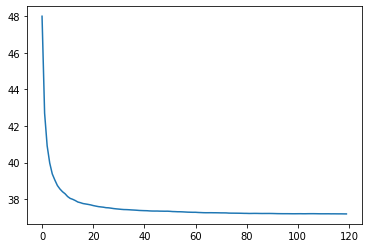

In [ ]:
plt.plot([r_mse(preds[:i+1].mean(0), y_val) for i in range(120)]);

### 4.4 Gradient Boosting Regressor

The best Gradient Boosting Regressor model was off by $35 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X_train_small.shape,y_train_small.shape, X_val.shape,y_val.shape

((156413, 1008), (156413,), (67035, 1008), (67035,))

In [ ]:
gbrt1 = GradientBoostingRegressor(max_depth=2,n_estimators=200)

In [ ]:
gbrt1.fit(X_train_small,y_train_small)

In [ ]:
errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt1.staged_predict(X_val)]

best_n_estimators = np.argmin(errors) + 1

In [ ]:
best_n_estimators

200

In [ ]:
gbrt1_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt1_best.fit(X_train_small,y_train_small)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print('Predictions:', gbrt1_best.predict(some_data))

Predictions: [ 60.85531352 114.53864108  57.21148825  44.44557102  72.66902208]


In [ ]:
print('Labels:', list(some_labels))

Labels: [49.0, 100.0, 54.0, 39.0, 75.0]


In [ ]:
gbrt_predictions = gbrt1_best.predict(X_val)
lin_mse = mean_squared_error(y_val, gbrt_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'GBRT BEST:',lin_rmse)

GBRT BEST: 58.62194734728165


In [ ]:
gbrt = GradientBoostingRegressor(max_depth=12,warm_start=True)

In [ ]:
min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1,400):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train_small,y_train_small)
  y_pred = gbrt.predict(X_val)
  val_error = mean_squared_error(y_val,y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break

In [ ]:
print('Predictions:', gbrt.predict(some_data))

Predictions: [120.76271392 195.32678132 181.94615     79.14061064 157.2743661 ]


In [ ]:
print('Labels:', list(some_labels))

Labels: [98.0, 200.0, 200.0, 93.0, 150.0]


In [ ]:
gbrt_predictions = gbrt.predict(X_val)
lin_mse = mean_squared_error(y_val, gbrt_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'GBRT:',lin_rmse)

GBRT: 35.76107935524114


In [ ]:
import joblib
joblib.dump(gbrt, 'GrdBossRegr.joblib')

['GrdBossRegr.joblib']

In [ ]:
GBRT = joblib.load('GrdBossRegr.joblib')

### 4.5 XGBoost

And finally the best XGBoost model was off by $36

In [ ]:
import xgboost

In [ ]:
xgb_reg = xgboost.XGBRegressor(learning_rate=0.2,max_depth=15, n_estimators=250, n_jobs=-1)
xgb_reg.fit(X_train_small,y_train_small,
            eval_set=[(X_val,y_val)],early_stopping_rounds=2)

[20:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:103.634
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:86.6501
[2]	validation_0-rmse:73.5757
[3]	validation_0-rmse:63.6214
[4]	validation_0-rmse:56.2164
[5]	validation_0-rmse:50.7474
[6]	validation_0-rmse:46.8182
[7]	validation_0-rmse:43.9711
[8]	validation_0-rmse:41.9967
[9]	validation_0-rmse:40.62
[10]	validation_0-rmse:39.6495
[11]	validation_0-rmse:38.9628
[12]	validation_0-rmse:38.486
[13]	validation_0-rmse:38.1328
[14]	validation_0-rmse:37.8915
[15]	validation_0-rmse:37.6866
[16]	validation_0-rmse:37.5543
[17]	validation_0-rmse:37.445
[18]	validation_0-rmse:37.3051
[19]	validation_0-rmse:37.2379
[20]	validation_0-rmse:37.1552
[21]	validation_0-rmse:37.0987
[22]	validation_0-rmse:37.0667
[23]	validation_0-rmse:37.0399
[24]	validation_0-rmse:37.0182
[25]	validation_0-rmse:36.9923
[26]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print('Predictions:', xgb_reg.predict(some_data))

Predictions: [109.65823 188.46838 183.66006  93.35098 139.3301 ]


In [ ]:
print('Labels:', list(some_labels))

Labels: [98.0, 200.0, 200.0, 93.0, 150.0]


In [ ]:
abnb_predictions = xgb_reg.predict(X_val)
lin_mse = mean_squared_error(y_val, abnb_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'XGB:',lin_rmse)

XGB: 36.55391769031858


In [ ]:
joblib.dump(xgb_reg, 'XtraGB.joblib')

['XtraGB.joblib']

### 4.6 Test

I decided to test the models with the Gradient Boosting Regressor and the XGBoosting models. 

In [ ]:
test_prepared = full_pipeline.transform(test_clean)

In [ ]:
test_prepared.shape

(55863, 1008)

In [ ]:
gbrt_predictions = gbrt.predict(test_prepared)
lin_mse = mean_squared_error(test_labels, gbrt_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'GBRT:',lin_rmse)

GBRT: 35.44521402040937


In [ ]:
gbrt_predictions = xgb_reg.predict(test_prepared)
lin_mse = mean_squared_error(test_labels, gbrt_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'GBRT:',lin_rmse)

GBRT: 36.380560979157245
